<a href="https://colab.research.google.com/github/andersonmdcanteli/wordle/blob/main/wordle_only_answers_first_guess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mastering WORDLE - Dataset 1: Only answers (PART 1)

This notebook contains part of the analyzes carried out to find the best words for the game ***WORLDE***.

The focus is on the dataset of words that can be used as the word of the day. For other datasets and a general discussion, see this [other notebook](https://colab.research.google.com/drive/1ulRd4zAWIo9Yq6GujbEX7eyp8XhXRCkO?usp=sharing).



## Libraries and versions

To perform this analysis, I'm using [Google Colab](https://colab.research.google.com/drive/1ulRd4zAWIo9Yq6GujbEX7eyp8XhXRCkO?usp=sharing), and the following libraries:

- Python: `3.7.13`
- Pandas: `1.3.5`
- NumPy: `1.21.6`
- matplotlib: `3.2.2`
- Seaborn: `0.11.2`
- SciPy: `1.7.3`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data collection and analysis

The list of words that are used as answers in the game is available in this [repository](https://gist.github.com/cfreshman/).

We can import the data using pandas:


In [2]:
df_answers = pd.read_csv(
    "https://gist.githubusercontent.com/cfreshman/a03ef2cba789d8cf00c08f767e0fad7b/raw/28804271b5a226628d36ee831b0e36adef9cf449/wordle-answers-alphabetical.txt",
    header=None, 
    names=['words'])
df_answers.head(2)

,words
0,aback
1,abase


In [3]:
df_answers.describe().transpose()

,count,unique,top,freq
words,2315,2315,aback,1


There are 2315 unique words that can be used as the word of the day. 

Initially, we need to analyze the data. One of the main pieces of information is the frequency of each letter in the words. To obtain this data, I will create a new column with a list where each element contains a single letter.

To do this I will apply the `list` function on column `"words"`

In [4]:
df_answers['letters'] = df_answers['words'].apply(list)
df_answers.head(2)

,words,letters
0,aback,"[a, b, a, c, k]"
1,abase,"[a, b, a, s, e]"


Next, let's create a new `DataFrame` containing five columns. Each column will contain the letter in its respective word position. That way, each cell will contain a single letter, and each row will contain a single word.

To do this, we can use method `to_list()` on column `"letters"` when creating the new `DataFrame`:

In [5]:
df_answers_letters = pd.DataFrame(df_answers['letters'].to_list(), columns=np.arange(1, 6)).copy()
df_answers_letters.head(2)

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e


Now we need to count the number of letters contained in the dataset. This is easily done using `pd.value_counts`:

In [6]:
df_answers_letters = df_answers_letters.apply(pd.value_counts)
df_answers_letters.head(2)

,1,2,3,4,5
a,141.0,304,307,163.0,64.0
b,173.0,16,57,24.0,11.0


The dataset contains:
- `141` letters `a` in the first position of the words;
- `304` letters `a` in the second position of the words;
- `307` letters `a` in the third position of the words;
- `163` letters `a` in the fourth position of the words;
- `64` letters `a` in the fifth position of the words.

NOTE: the first, fourth and fifth column contain `float` values as there are letters that are not present in this position, and its positions were filled with `NaN`.

To get the total count of each letter, we just need sum the number of letters in each row (`axis=1`):


In [7]:
df_answers_letters['sum'] = df_answers_letters.sum(axis=1)
df_answers_letters.head(2)

,1,2,3,4,5,sum
a,141.0,304,307,163.0,64.0,979.0
b,173.0,16,57,24.0,11.0,281.0


Now we need the total letters in the dataset to get the frequency of each letter. To do this, just sum all column `"sum"`:

In [8]:
letters_count_answers = df_answers_letters['sum'].sum()
letters_count_answers

11575.0

Hence, the dataset contains 11575 letters, which corresponds to the total number of words times the number of letters in each word ($2315 \times 5=11575$). 

The frequency of each letter is the letter count divided by the total number of letters; that is:

In [9]:
df_answers_letters['frequency_answers'] = df_answers_letters['sum']/letters_count_answers
df_answers_letters.head(2)

,1,2,3,4,5,sum,frequency_answers
a,141.0,304,307,163.0,64.0,979.0,0.084579
b,173.0,16,57,24.0,11.0,281.0,0.024276


To get a better view, we can plot a bar chart:

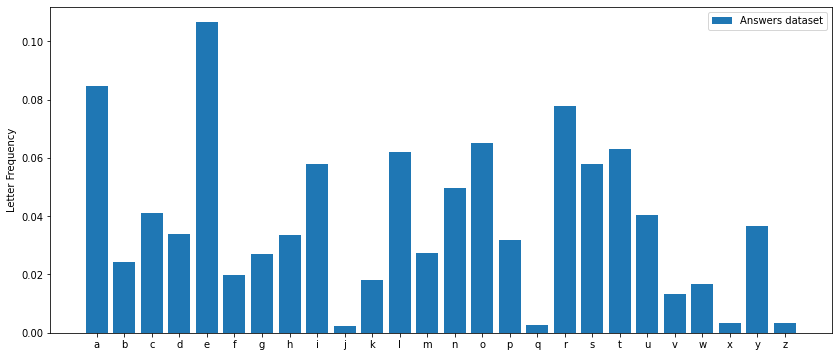

In [10]:
plt.figure(figsize=(14,6))
plt.bar(df_answers_letters.index, df_answers_letters['frequency_answers'], label="Answers dataset")
plt.ylabel("Letter Frequency")
plt.legend()
plt.show()

To easily find which letters are most frequent, we can sort the data and plot the graph again:

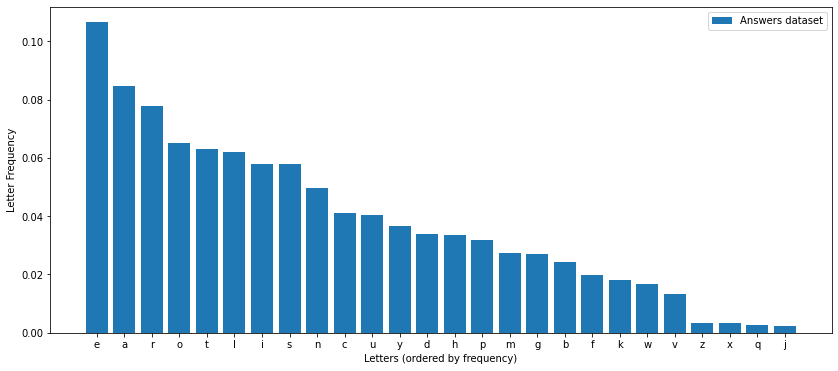

In [11]:
df_aux = df_answers_letters.sort_values(by='frequency_answers', ascending=False).copy() # sorting
plt.figure(figsize=(14,6))
plt.bar(df_aux.index, df_aux['frequency_answers'], label="Answers dataset")
plt.ylabel("Letter Frequency")
plt.xlabel("Letters (ordered by frequency)")
plt.legend()
plt.show()

Hence, the letter `e` is the most frequent letter, followed by the letters `a`, `r`, `o` and `t`. Less frequent letters are the letters `j`, `q`, `x`, `z` and `v`.

The words containing the letters `e`, `a`, `r`, `o` and `t` should be better guesses. Let's find out which ones they are! 



## Strength of each word

To estimate the strength of each word, I will create an auxiliary `DataFrame` with each letter separated in a single cell:

In [12]:
df_answers_aux = pd.DataFrame(df_answers['letters'].to_list(), columns=range(1,6))
df_answers_aux.head(2)

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e


And I will also create a `DataFrame` with just the frequencies of each letter:

In [13]:
df_freq_answers = pd.DataFrame(data=df_answers_letters['frequency_answers'])
df_freq_answers.head(2)

,frequency_answers
a,0.084579
b,0.024276


This data frame contains the estimated strength for each letter, regardless of the position the letter occupies in the word. I will export this dataset as it will be used in other analyses. This dataset is available at [this link](
https://drive.google.com/file/d/1UIemFrAwSlsnE8BzZnJeDphALIYNE446/view?usp=sharing)

In [14]:
df_freq_answers.to_csv("df_freq_answers.csv", index=True)

Now we can use the frequency estimated for each `letter` to find the strength for each word. We just need to replace each `letter` on the `df_answers_aux` for its corresponding frequency (`df_freq_answers`):

In [15]:
for i in df_freq_answers.index:
  df_answers_aux.replace(i, df_freq_answers['frequency_answers'][i], inplace=True)
df_answers_aux.head(2)

,1,2,3,4,5
0,0.084579,0.024276,0.084579,0.041210,0.018143
1,0.084579,0.024276,0.084579,0.057797,0.106523


Now, we need to sum each row

In [16]:
df_answers_aux['strength'] = df_answers_aux.sum(axis=1)
df_answers_aux.head()

,1,2,3,4,5,strength
0,0.084579,0.024276,0.084579,0.041210,0.018143,0.252786
1,0.084579,0.024276,0.084579,0.057797,0.106523,0.357754
2,0.084579,0.024276,0.084579,0.062981,0.106523,0.362937
3,0.084579,0.024276,0.024276,0.106523,0.036717,0.276371
4,0.084579,0.024276,0.024276,0.065140,0.062981,0.261253


Since the row indices are the same, we can allocate the estimated strength directly to the `DataFrame` `df_answers`:

In [17]:
df_answers['strength'] = df_answers_aux['strength'].copy()
df_answers['strength'] = df_answers['strength'].round(7)
df_answers.head(2)

,words,letters,strength
0,aback,"[a, b, a, c, k]",0.252786
1,abase,"[a, b, a, s, e]",0.357754


NOTE: Column `"strength"` has been rounded to 7 decimal places to prevent mistakes due to decimal fluctuations.

The best words are going to be the ones that have the highest "strength". For this, I will create a new column called `"rank"` by applying the `rank` function to the `"strength"` column:

In [18]:
df_answers['rank'] = df_answers['strength'].rank(ascending=False, method="dense").astype(int)
df_answers.head(2)

,words,letters,strength,rank
0,aback,"[a, b, a, c, k]",0.252786,942
1,abase,"[a, b, a, s, e]",0.357754,118


Hence, the **TOP 10 words** for the first guess are:

In [19]:
df_answers[df_answers['rank'] <= 10].sort_values(by='rank')

,words,letters,strength,rank
634,eerie,"[e, e, r, i, e]",0.455205,1
629,eater,"[e, a, t, e, r]",0.438272,2
668,erase,"[e, r, a, s, e]",0.433089,3
1543,rarer,"[r, a, r, e, r]",0.424104,4
639,elate,"[e, l, a, t, e]",0.422721,5
2023,tease,"[t, e, a, s, e]",0.418402,6
627,easel,"[e, a, s, e, l]",0.417538,7
1113,lease,"[l, e, a, s, e]",0.417538,7
2031,tepee,"[t, e, p, e, e]",0.414255,8
674,ester,"[e, s, t, e, r]",0.411490,9


## Adding penalty for words with repeated letters

So the best word to use is the word `Eerie`! Wait, what?!

This word repeats the letter `e` 3 times which is the most frequent vowel in the dataset! But it makes no sense to waste two positions on the first try using the same letter! Using words that have repeated letters reduces our chances!

We have two ways to proceed with the analysis: one of them would be to assign a penalty to words that contain repeated letters. The second would be to disregard words with repeated letters.

To choose the first best word I will use the *first option*. However, I will use arbitrary parameters.

To apply this penalty, we need to know which words contain repeated letters. To figure this out, I'm going to apply a function (`unique`) that returns only the single letters of a string and also maintains the order of the letters in the word.

In [20]:
def unique(sequence):
  # source  https://stackoverflow.com/a/58666031/17872198
  seen = set()
  return [x for x in sequence if not (x in seen or seen.add(x))]
## example
unique("juliana")

['j', 'u', 'l', 'i', 'a', 'n']

In [21]:
df_answers['unique_letters'] = df_answers['letters'].apply(unique).apply("".join)
df_answers.head(2)

,words,letters,strength,rank,unique_letters
0,aback,"[a, b, a, c, k]",0.252786,942,abck
1,abase,"[a, b, a, s, e]",0.357754,118,abse


Now we need to count the number of letters left after removing the repeated letters. For this, we can use the `len` function in the `"unique_letters"` column:

In [22]:
df_answers['count_unique'] = df_answers['unique_letters'].str.len()
df_answers.head(2)

,words,letters,strength,rank,unique_letters,count_unique
0,aback,"[a, b, a, c, k]",0.252786,942,abck,4
1,abase,"[a, b, a, s, e]",0.357754,118,abse,4


To find out how many words contain 5 unique letters we can use the `value_counts` method:

In [23]:
df_answers['count_unique'].value_counts()

5    1566
4     691
3      57
2       1
Name: count_unique, dtype: int64

Out of curiosity, let's find out the word that contains only 2 unique letters. To do this, we just need a filter:

In [24]:
df_answers[df_answers['count_unique'] == 2]

,words,letters,strength,rank,unique_letters,count_unique
1189,mamma,"[m, a, m, m, a]",0.251058,958,ma,2


Now it is necessary to decide a criterion for penalizing words with repeated letters. As the more repeated letters, the worse the guess, the penalty should be greater the more repeated letters the word has.

The criterion I will use is very simple: for each repeated letter, the word must lose 20% of its strength. That is:

- words with `5` unique letters should not be penalized;
- words with `4` unique letters must lose 20% of their strength;
- words with `3` unique letters must lose 40% of their strength;
- words with `2` unique letters must lose 60% of their strength;

We can write a simple function that will do this task:

In [25]:
def penalty_func(x):
  if x == 5:
    return 1
  elif x == 4:
    return 0.8
  elif x == 3:
    return 0.6
  elif x == 2:
    return 0.4
  else:
    return 0.2

Now we just need to create a new column with the penalty (correction factor):

In [26]:
df_answers['penalty'] = df_answers['count_unique'].apply(penalty_func)
df_answers.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty
0,aback,"[a, b, a, c, k]",0.252786,942,abck,4,0.8
1,abase,"[a, b, a, s, e]",0.357754,118,abse,4,0.8


To apply the penalty, simply multiply column `"strength"` by the `"penalty"` column:

In [27]:
df_answers['strength_penalty'] = df_answers['strength']*df_answers['penalty']
df_answers['strength_penalty'] = df_answers['strength_penalty'].round(7)
df_answers.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty
0,aback,"[a, b, a, c, k]",0.252786,942,abck,4,0.8,0.202229
1,abase,"[a, b, a, s, e]",0.357754,118,abse,4,0.8,0.286203


Finally, we can create a new ranking based on the `"strength_penalty"` column:

In [28]:
df_answers['rank_penalty'] = df_answers['strength_penalty'].rank(ascending=False, method="dense").astype(int)
df_answers.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty
0,aback,"[a, b, a, c, k]",0.252786,942,abck,4,0.8,0.202229,1325
1,abase,"[a, b, a, s, e]",0.357754,118,abse,4,0.8,0.286203,509


Hence, the **TOP 10 words** for the first guess are:

In [29]:
df_answers[df_answers['rank_penalty'] <= 10].sort_values(by='rank_penalty')

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty
48,alert,"[a, l, e, r, t]",0.393866,24,alert,5,1.0,0.393866,1
67,alter,"[a, l, t, e, r]",0.393866,24,alter,5,1.0,0.393866,1
1102,later,"[l, a, t, e, r]",0.393866,24,later,5,1.0,0.393866,1
108,arose,"[a, r, o, s, e]",0.391706,25,arose,5,1.0,0.391706,2
1043,irate,"[i, r, a, t, e]",0.389719,28,irate,5,1.0,0.389719,3
1908,stare,"[s, t, a, r, e]",0.389546,29,stare,5,1.0,0.389546,4
105,arise,"[a, r, i, s, e]",0.384536,38,arise,5,1.0,0.384536,5
1534,raise,"[r, a, i, s, e]",0.384536,38,raise,5,1.0,0.384536,5
1112,learn,"[l, e, a, r, n]",0.380562,42,learn,5,1.0,0.380562,6
1572,renal,"[r, e, n, a, l]",0.380562,42,renal,5,1.0,0.380562,6


## Adding weights due to letter position in the word

Note that the words `alert`, `alter` and `later` have the same strength as they are *anagrams*. But are they the same? Does the position of the letter in the word increase the chances of getting the word right? Let's find out!

Let's look at the word count that contains the letter `a`

In [30]:
df_answers_letters.loc[["a"]]

,1,2,3,4,5,sum,frequency_answers
a,141.0,304,307,163.0,64.0,979.0,0.084579


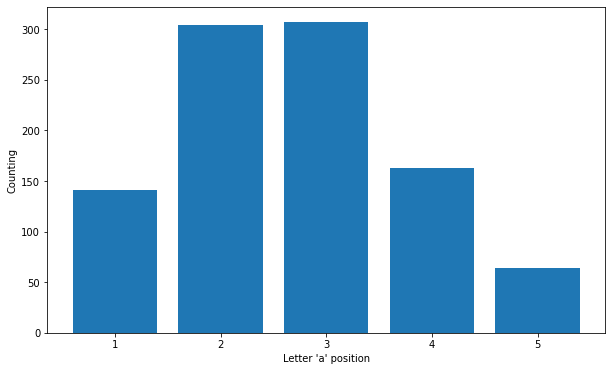

In [31]:
plt.figure(figsize=(10,6))
plt.bar(list(df_answers_letters.columns[:5]), df_answers_letters.loc[["a"], :5].values.flatten().tolist())
plt.xlabel("Letter 'a' position")
plt.ylabel("Counting")
plt.show()

Based only on the letter `"a"` count in each of the five possible positions, the word `"later"` should be ranked better than the words `"alert"` and `"alter"` because the letter `"a"` is in a position where it occurs more often.

To get a better look at this, let's plot a heatmap. For this, I will create a new `DataFrame` with the five columns containing the count of each letter in the respective position (filtering the `DataFrame` `df_answers_letters`):

In [32]:
df_answers_letters_position = df_answers_letters[[1, 2, 3, 4, 5]].copy()
df_answers_letters_position.head(2)

,1,2,3,4,5
a,141.0,304,307,163.0,64.0
b,173.0,16,57,24.0,11.0


Now we can plot a heatmap using seaborn:

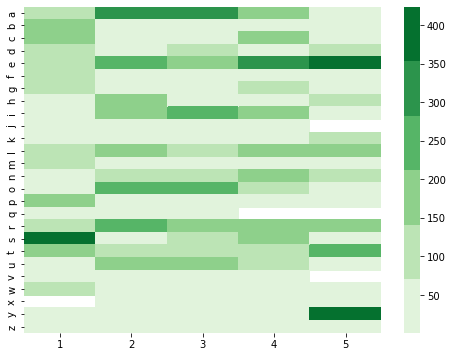

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_answers_letters_position[[1, 2, 3, 4, 5]], cmap=sns.color_palette("Greens"))
plt.show()

We can see that the letter `"s"` has a much higher occurrence in the first position than in the others. Similarly, the letter `"y"` occurs more often in the fifth position. The letter `"e"` occurs predominantly in positions 2, 4 and 5.

Hence, considering where the letter is in the word is an important criterion to decide which word is the best. 

To estimate the strength of each word by position, simply divide the frequency of the letter in a position by the total number of letters in the respective position. We can use a loop to loop through the columns as follows:

In [34]:
for i in range(1,6):
  df_answers_letters_position[i] = df_answers_letters_position[i]/df_answers_letters_position[i].sum()
df_answers_letters_position.head(2)

,1,2,3,4,5
a,0.060907,0.131317,0.132613,0.070410,0.027646
b,0.074730,0.006911,0.024622,0.010367,0.004752


The sum in each column must equal 1:

In [35]:
for i in range(1,6):
  print(df_answers_letters_position[i].sum())

1.0
1.0
1.0
1.0
1.0


We repeat the heatmap, but with estimated weights for each word in each position annotate:

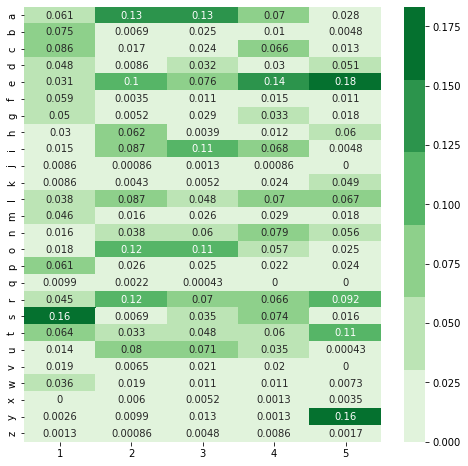

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_answers_letters_position[[1, 2, 3, 4, 5]].fillna(0), cmap=sns.color_palette("Greens"), annot=True)
plt.show()

We can use the matrix that contains the weights to consider the position of each letter in the word. To do this, we just need to multiply each probability by the respective weight:

In [37]:
df_prob_weights = pd.DataFrame(columns=range(1,6))
for i in range(1,6):
  df_prob_weights[i] = df_answers_letters_position[i]*df_freq_answers['frequency_answers']
df_prob_weights.head()

,1,2,3,4,5
a,0.005151,0.011107,0.011216,0.005955,0.002338
b,0.001814,0.000168,0.000598,0.000252,0.000115
c,0.003525,0.000712,0.000997,0.002706,0.000552
d,0.001628,0.000293,0.001100,0.001012,0.001731
e,0.003313,0.011135,0.008144,0.014632,0.019510


This data frame contains the estimated strength for each letter, considering the position that the letter occupies in the word. I will export this dataset as it will be used in other analyses. This dataset is available at [this link](
https://drive.google.com/file/d/10vlb5SJCO3uNIKHghS7spP-SeKvwPAxA/view?usp=sharing).

In [38]:
df_prob_weights.to_csv("df_prob_weights.csv", index=True)

Now I will recreate the auxiliary dataframe:

In [39]:
df_answers_aux = pd.DataFrame(df_answers['letters'].to_list(), columns=range(1,6))
df_answers_aux.head(2)

,1,2,3,4,5
0,a,b,a,c,k
1,a,b,a,s,e


And then, I will replace each letter by its respective frequency, but using the frequencies with the weight of the position considered:

In [40]:
for column in df_prob_weights.columns:
  for i in df_prob_weights.index:
    df_answers_aux[column].replace(i, df_prob_weights[column][i], inplace=True)
df_answers_aux.head(2)

,1,2,3,4,5
0,0.005151,0.000168,0.011216,0.002706,0.000886
1,0.005151,0.000168,0.011216,0.004269,0.019510


Now, we just  need to sum each row:

In [41]:
df_answers_aux['strength'] = df_answers_aux.sum(axis=1)
df_answers_aux.head(2)

,1,2,3,4,5,strength
0,0.005151,0.000168,0.011216,0.002706,0.000886,0.020127
1,0.005151,0.000168,0.011216,0.004269,0.019510,0.040315


Now, we can add this other way of estimating the strength of the words in the original `DataFrame`:

In [42]:
df_answers['strength_weigth'] = df_answers_aux['strength'].copy()
df_answers['strength_weigth'] = df_answers['strength_weigth'].round(7)
df_answers.head()

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weigth
0,aback,"[a, b, a, c, k]",0.252786,942,abck,4,0.8,0.202229,1325,0.020127
1,abase,"[a, b, a, s, e]",0.357754,118,abse,4,0.8,0.286203,509,0.040315
2,abate,"[a, b, a, t, e]",0.362937,92,abte,4,0.8,0.290350,460,0.039827
3,abbey,"[a, b, b, e, y]",0.276371,740,abey,4,0.8,0.221097,1188,0.026323
4,abbot,"[a, b, b, o, t]",0.261253,867,abot,4,0.8,0.209002,1274,0.016514


Finally, we can apply the penalty due to word repetition:

In [43]:
df_answers['strength_weigth_penalty'] = df_answers['strength_weigth']*df_answers['penalty']
df_answers['strength_weigth_penalty'] = df_answers['strength_weigth_penalty'].round(7)
df_answers.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weigth,strength_weigth_penalty
0,aback,"[a, b, a, c, k]",0.252786,942,abck,4,0.8,0.202229,1325,0.020127,0.016102
1,abase,"[a, b, a, s, e]",0.357754,118,abse,4,0.8,0.286203,509,0.040315,0.032252


and create a new ranking for the words:

In [44]:
df_answers['rank_weigth_penalty'] = df_answers['strength_weigth_penalty'].rank(ascending=False, method="dense").astype(int)
df_answers.head(2)

,words,letters,strength,rank,unique_letters,count_unique,penalty,strength_penalty,rank_penalty,strength_weigth,strength_weigth_penalty,rank_weigth_penalty
0,aback,"[a, b, a, c, k]",0.252786,942,abck,4,0.8,0.202229,1325,0.020127,0.016102,1906
1,abase,"[a, b, a, s, e]",0.357754,118,abse,4,0.8,0.286203,509,0.040315,0.032252,395


Hence, the **TOP 10 words** for the first guess  are:

In [45]:
df_answers[['words', 'rank', 'rank_penalty', 'rank_weigth_penalty']][df_answers['rank_weigth_penalty'] <= 10].sort_values(by='rank_weigth_penalty')

,words,rank,rank_penalty,rank_weigth_penalty
1777,slate,56,8,1
458,crane,109,30,2
1908,stare,29,4,3
1711,share,107,29,4
462,crate,58,9,5
1819,snare,51,7,6
2093,trace,58,9,7
1651,saute,141,46,8
1902,stale,56,8,9
1704,shale,189,75,10


And the **WORST 10 words** fir the first guess are:

In [46]:
df_answers[['words', 'rank', 'rank_penalty', 'rank_weigth_penalty']][df_answers['rank_weigth_penalty'] >= (df_answers['rank_weigth_penalty'].max() - 10)].sort_values(by='rank_weigth_penalty')

,words,rank,rank_penalty,rank_weigth_penalty
1169,lupus,1103,1429,2301
1232,mimic,1224,1564,2302
2211,vivid,1340,1574,2303
1189,mamma,958,1578,2304
1272,mucus,1237,1495,2305
1174,lymph,1302,1398,2306
1003,humph,1353,1558,2307
774,fluff,1358,1579,2308
1064,jumbo,1361,1516,2309
1004,humus,1268,1514,2310


The analysis to choose the best pair of words to use in the first two attempts follows in [this notebook](https://colab.research.google.com/drive/1sZVgDEfmrJi7SXqWMDqPv-PSMp9-LfTQ?usp=sharing).